# 🔥 Disaster Tweets Classification Project 🚀  
## Formulating Algorithms and Comparing Various Approaches  

This project dwells into a deep understanding of the NLP classification problem, covering everything from data exploration to model building. 

I will also cover some theoretical concepts.

We get into NLP concepts, approaches for feature engineering, and insights into the data.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack

import warnings
warnings.filterwarnings('ignore')

# 📚 Libraries Used in This Notebook  

This notebook utilizes a combination of **data processing, NLP, and machine learning** libraries to effectively classify disaster-related tweets. Below is a brief explanation of each library:

### 🔹 **Data Handling & Manipulation**  
- `pandas`: For loading, exploring, and manipulating structured datasets.  
- `numpy`: Provides numerical computing support, used for handling arrays and mathematical operations.  

### 🔹 **Visualization**  
- `matplotlib.pyplot`: A popular library for creating visualizations such as histograms, bar plots, and scatter plots to analyze data distributions.  

### 🔹 **Natural Language Processing (NLP)**  
- `nltk`: A powerful NLP toolkit used for text preprocessing.  
  - `stopwords`: Helps remove common words (e.g., "the", "is", "and") that may not contribute to classification.  
  - `word_tokenize`: Splits text into individual words for further processing.  
  - `PorterStemmer`: Reduces words to their root form (e.g., "running" → "run") to normalize text.  
- `re`: A built-in Python module for handling **regular expressions**, useful for text cleaning (e.g., removing URLs, punctuation, and special characters).  

### 🔹 **Feature Extraction**  
- `TfidfVectorizer`: Converts text into numerical features using **Term Frequency-Inverse Document Frequency (TF-IDF)**, which highlights important words in a document.  

### 🔹 **Data Splitting & Model Training**  
- `train_test_split`: Splits data into training and testing sets for model evaluation.  
- `hstack`: Combines sparse matrices (e.g., TF-IDF features) efficiently for model input.  

### 🔹 **Machine Learning Models**  
We use a variety of classification models to predict whether a tweet describes a real disaster:  
- `RandomForestClassifier`: An ensemble learning method that builds multiple decision trees for robust classification.  
- `SVC`: Support Vector Machine (SVM), a powerful model for text classification that finds an optimal decision boundary.  
- `XGBClassifier`: **XGBoost**, a high-performance gradient boosting algorithm widely used in Kaggle competitions.  
- `LogisticRegression`: A simple yet effective linear classifier that predicts probabilities.  

### 🔹 **Evaluation Metrics**  
- `accuracy_score`: Measures how many predictions were correct, though we will also focus on the **F1-score**, which is the competition's evaluation metric.  

This diverse set of libraries ensures that we can preprocess, analyze, and build powerful models for disaster tweet classification. 🚀  


# 🔍 Exploratory Data Analysis (EDA) for Disaster Tweet Classification

In this section, we will explore the dataset step by step, visualizing patterns and gaining insights before building our machine learning model.

---

## 📌 Step 1: Load the Data
Before performing any analysis, let's load the dataset and inspect the first few rows.

In [2]:
# Loading the data
import pandas as pd

train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

# Display first few rows of train data
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Explanation of Columns:
- **id**: A unique identifier for each tweet.  
- **keyword**: A specific keyword associated with the tweet, but many values are missing (`NaN`).  
- **location**: The location from where the tweet was posted, but it is also missing (`NaN`) in these examples.  
- **text**: The actual content of the tweet. Some tweets contain hashtags (`#earthquake`, `#wildfires`), which might help in classification.  
- **target**: The label indicating whether the tweet is about a disaster (`1`) or not (`0`). In this sample, all tweets are labeled as disaster-related (`target = 1`).  

Since `keyword` and `location` have missing values, we may need to handle them during preprocessing. The `text` column is the primary feature used to determine whether a tweet describes a real disaster. 

Further data exploration and preprocessing steps, such as handling missing values, tokenization, and vectorization, will help improve model performance.

## 📌 Step 2: Check Dataset Information
We check the structure of the dataset, including column names, data types, and missing values.

In [3]:
# Check dataset structure
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


## Role of `df.info()`

The `df.info()` function in pandas provides a concise summary of a DataFrame, helping to understand its structure and contents. It is useful for:

1. **Checking the Number of Entries**: Displays the total number of rows (data points).
2. **Listing Column Names and Data Types**: Shows each column's name, data type (`int64`, `object`, etc.), and whether they contain numerical or textual data.
3. **Identifying Missing Values**: Shows how many non-null values exist in each column, helping to detect missing data.
4. **Memory Usage**: Displays the approximate memory consumption of the DataFrame.

This function is crucial in **data exploration** to assess dataset completeness and determine necessary preprocessing steps.


## 📌 Step 3: Check for Missing Values
We identify missing values in the dataset and visualize them using a heatmap.

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id             0
keyword       26
location    1105
text           0
dtype: int64


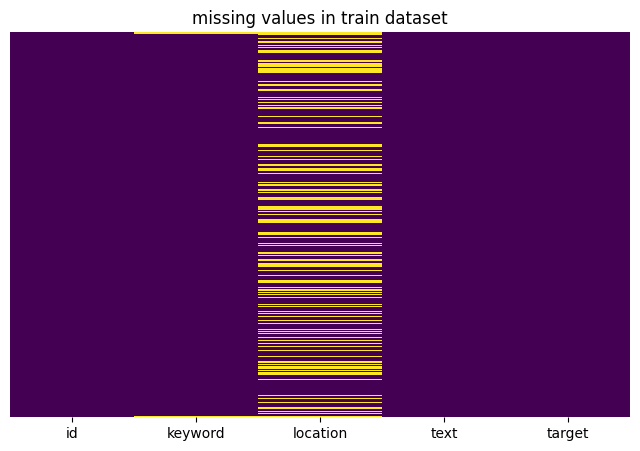

In [4]:
# Count missing values in train and test data
print(train_df.isnull().sum())
print(test_df.isnull().sum())

# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(train_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("missing values in train dataset")
plt.show()

## Missing Values Heatmap Analysis

- **Dark purple**: No missing values (`id`, `text`, `target`).
- **Yellow**: Missing values (`keyword`, `location`).
- **Observations**:
  - `keyword`: Few missing values (thin yellow line).
  - `location`: Many missing values (scattered yellow lines).

### Next Steps (maybe):
- **`keyword`**: Fill missing values with `"Unknown"` or drop them.
- **`location`**: Drop if not useful or fill with `"Unknown"`.

This helps in preprocessing for better model performance.


## 📌 Step 4: Class Distribution (Target Analysis)
We analyze the distribution of disaster vs. non-disaster tweets.

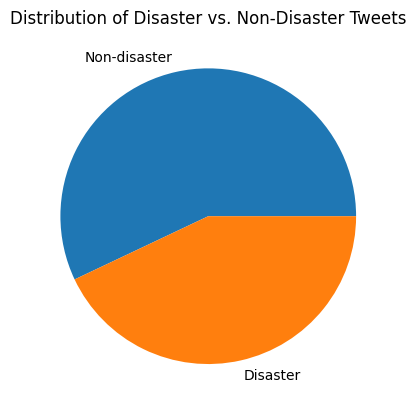

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64

In [5]:
# Count plot of target variable
counts = train_df["target"].value_counts()
plt.pie(counts, labels=["Non-disaster", "Disaster"])
plt.title("Distribution of Disaster vs. Non-Disaster Tweets")
plt.show()

# Print value counts
train_df["target"].value_counts(normalize=True)

## 📌 Step 5: Text Length Analysis
We compare the number of characters in disaster and non-disaster tweets.

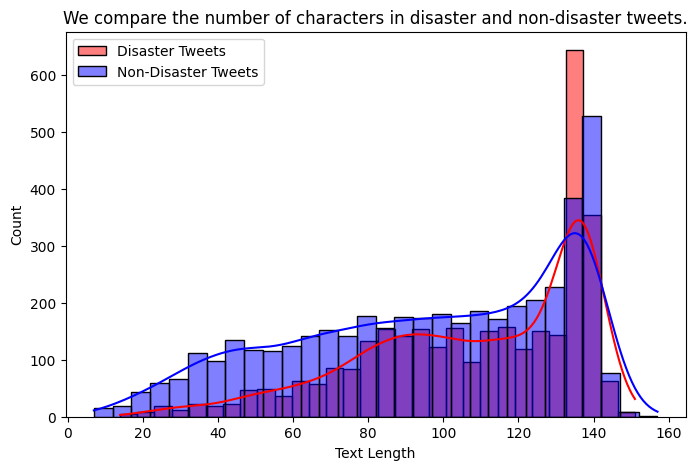

In [6]:
# Add new column for text length
train_df["text_length"] = train_df["text"].apply(len)

# Plot text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_df[train_df["target"] == 1]["text_length"], bins=30, color="red", label="Disaster Tweets", kde=True)
sns.histplot(train_df[train_df["target"] == 0]["text_length"], bins=30, color="blue", label="Non-Disaster Tweets", kde=True)
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.legend()
plt.title("We compare the number of characters in disaster and non-disaster tweets.")
plt.show()


## 📌 Step 6: Most Common Words (Word Cloud)
We generate word clouds to visualize frequently used words.

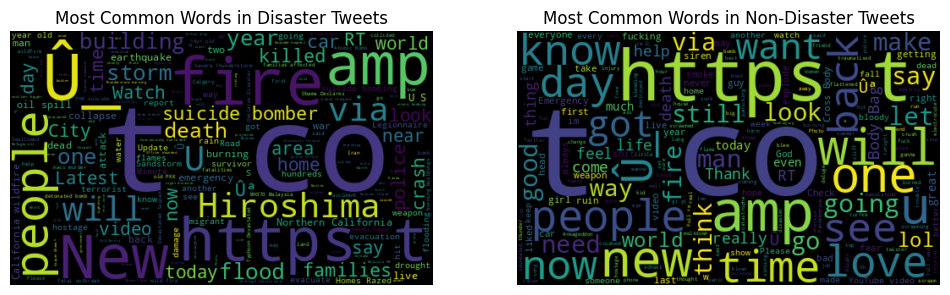

In [7]:
from wordcloud import WordCloud

# Generate word clouds for disaster and non-disaster tweets
disaster_text = " ".join(train_df[train_df["target"] == 1]["text"])
non_disaster_text = " ".join(train_df[train_df["target"] == 0]["text"])

plt.figure(figsize=(12, 5))

# Disaster tweets word cloud
plt.subplot(1, 2, 1)
wordcloud = WordCloud(width=500, height=300, background_color="black").generate(disaster_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Disaster Tweets")

# Non-disaster tweets word cloud
plt.subplot(1, 2, 2)
wordcloud = WordCloud(width=500, height=300, background_color="black").generate(non_disaster_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Non-Disaster Tweets")

plt.show()


## 📌 Step 7: Hashtags & Mentions Analysis
We extract hashtags and analyze their frequency.

In [8]:
import re
import collections

# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

# Extract hashtags from disaster and non-disaster tweets
disaster_hashtags = sum(train_df[train_df["target"] == 1]["text"].apply(extract_hashtags), [])
non_disaster_hashtags = sum(train_df[train_df["target"] == 0]["text"].apply(extract_hashtags), [])

# Count most common hashtags
disaster_hashtag_counts = collections.Counter(disaster_hashtags).most_common(10)
non_disaster_hashtag_counts = collections.Counter(non_disaster_hashtags).most_common(10)

print("*****************************************************************************************************")
print("Top 10 Hashtags in Disaster Tweets:", disaster_hashtag_counts)
print("*****************************************************************************************************")
print("Top 10 Hashtags in Non-Disaster Tweets:", non_disaster_hashtag_counts)
print("*****************************************************************************************************\n")

*****************************************************************************************************
Top 10 Hashtags in Disaster Tweets: [('News', 33), ('news', 23), ('Hiroshima', 21), ('hot', 13), ('prebreak', 13), ('best', 13), ('Japan', 10), ('India', 10), ('yyc', 10), ('Sismo', 9)]
*****************************************************************************************************
Top 10 Hashtags in Non-Disaster Tweets: [('hot', 18), ('prebreak', 17), ('best', 17), ('news', 15), ('GBBO', 13), ('islam', 11), ('NowPlaying', 10), ('nowplaying', 10), ('jobs', 9), ('EDM', 8)]
*****************************************************************************************************



## 📌 Step 8: Presence of URLs and Mentions (@user)
We check how many tweets contain URLs or user mentions.

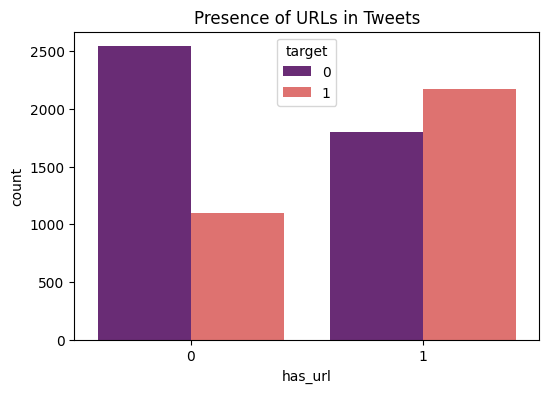

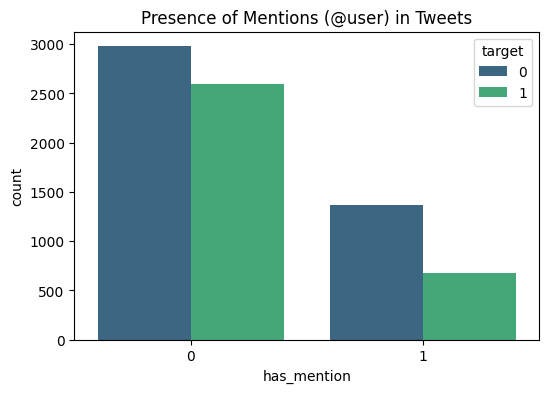

In [9]:
# Count presence of URLs and mentions
train_df["has_url"] = train_df["text"].apply(lambda x: 1 if "http" in x else 0)
train_df["has_mention"] = train_df["text"].apply(lambda x: 1 if "@" in x else 0)

# Plot URL presence
plt.figure(figsize=(6, 4))
sns.countplot(x="has_url", hue="target", data=train_df, palette="magma")
plt.title("Presence of URLs in Tweets")
plt.show()

# Plot mentions presence
plt.figure(figsize=(6, 4))
sns.countplot(x="has_mention", hue="target", data=train_df, palette="viridis")
plt.title("Presence of Mentions (@user) in Tweets")
plt.show()


## Understanding the Plot (has_mention is same as this)

- **X-axis (`has_url`)**:  
  - `0` → Tweets **without** URLs.  
  - `1` → Tweets **with** URLs.  

- **Y-axis (`count`)**: Number of tweets in each category.

- **Colors (`target`)**:  
  - **Purple (0)** → Non-disaster tweets.  
  - **Red (1)** → Disaster-related tweets.
    
## Insights from the Plot

- Tweets **with URLs (`has_url = 1`) are more likely disaster-related**  
  - (`red` bar is taller than `purple` for `has_url = 1`).

- Tweets **without URLs (`has_url = 0`) are mostly non-disaster**  
  - (`purple` bar is taller than `red` for `has_url = 0`).


## 📌 Step 9: Location Analysis (Optional)
We examine the most common locations if the 'location' column contains useful information.

In [10]:
# Top locations in the dataset
print(train_df["location"].value_counts().head(10))


location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: count, dtype: int64


## 📌 Step 10: N-grams Analysis (Common Bigrams & Trigrams)
We identify the most common word pairs and triplets.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n-grams
def get_top_ngrams(corpus, ngram_range=(2, 2), n=10):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bow = vec.transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top bigrams in disaster tweets
print("*****************************************************************************************************")
print("Top 10 Bigrams in Disaster Tweets:", get_top_ngrams(train_df[train_df["target"] == 1]["text"]))
print("*****************************************************************************************************")
# Top trigrams in disaster tweets
print("Top 10 Trigrams in Disaster Tweets:", get_top_ngrams(train_df[train_df["target"] == 1]["text"], ngram_range=(3,3)))
print("*****************************************************************************************************")

*****************************************************************************************************
Top 10 Bigrams in Disaster Tweets: [('http co', 2382), ('in the', 145), ('https co', 134), ('of the', 119), ('û_ http', 109), ('suicide bomber', 59), ('on the', 51), ('more than', 43), ('at the', 42), ('have been', 42)]
*****************************************************************************************************
Top 10 Trigrams in Disaster Tweets: [('û_ http co', 109), ('northern california wildfire', 29), ('more homes razed', 29), ('homes razed by', 29), ('the latest more', 28), ('latest more homes', 28), ('razed by northern', 28), ('pkk suicide bomber', 28), ('suicide bomber who', 28), ('bomber who detonated', 28)]
*****************************************************************************************************


## Explanation of N-gram Analysis

- **Bigram Analysis (Top 10 Pairs of Words)**
  - Common bigrams include **"http co"**, **"https co"**, and **"û_ http"**  
  - This suggests that disaster-related tweets often contain URLs.

- **Trigram Analysis (Top 10 Sequences of Three Words)**
  - Phrases like **"northern california wildfire"** and **"pkk suicide bomber"**  
  - Indicate frequent topics in disaster tweets.

### Key Observations:
- URLs appear frequently in disaster tweets.
- Repetitive word patterns highlight trending disaster events.
- Extracting n-grams helps identify common themes in textual data.


# 🛠 Text Preprocessing for Disaster Tweet Classification

After performing **Exploratory Data Analysis (EDA)**, we now preprocess the text data to clean and normalize it before feeding it into machine learning models.

---

## 📌 Step 1: Convert to Lowercase
To ensure consistency, we convert all text to lowercase.

In [12]:
# Convert text to lowercase
train_df["text"] = train_df["text"].str.lower()
test_df["text"] = test_df["text"].str.lower()

## 📌 Step 2: Remove Punctuation, Special Characters, and Digits
We remove unnecessary symbols that do not add meaning to the text.

In [13]:
import re

# Function to clean text
def remove_special_chars(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Keep only letters and spaces
    return text

# Apply function to text column
train_df["text"] = train_df["text"].apply(remove_special_chars)
test_df["text"] = test_df["text"].apply(remove_special_chars)


## 📌 Step 3: Remove URLs? and Mentions (@user)?

✅ Reasons to Keep (or Encode Differently):

The EDA shows that URLs are correlated with disaster tweets.
Instead of removing, we could create a new feature:
has_url = 1 if a tweet contains a URL, else has_url = 0
This feature might improve classification accuracy without polluting textual data.

### Recommended Approach
🔹 (We have done this) Extract URL presence as a binary feature (has_url)

🔹 Remove URLs from the text (so our model focuses on words, not links)

In [14]:
# Our current dataframe looks like this: -
train_df.head()

,id,keyword,location,text,target,text_length,has_url,has_mention
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,69,0,0
1,4,NaN,NaN,forest fire near la ronge sask canada,1,38,0,0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,133,0,0
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,65,0,0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,88,0,0


## 📌 Step 4: Tokenization
We break the text into individual words (tokens).

In [15]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download("punkt")  # Download tokenizer dataset

# Tokenize text
train_df["text"] = train_df["text"].apply(word_tokenize)
test_df["text"] = test_df["text"].apply(word_tokenize)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 📌 Step 5: Remove Stopwords
Common words like "the", "is", "in" that do not contribute meaning are removed.

In [16]:
from nltk.corpus import stopwords

nltk.download("stopwords")  # Download stopwords dataset
stop_words = set(stopwords.words("english"))

# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply function
train_df["text"] = train_df["text"].apply(remove_stopwords)
test_df["text"] = test_df["text"].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 📌 Step 6: Stemming (Reducing Words to Their Root Form)
Stemming helps in reducing words to their root forms, for example, "running" → "run".

In [17]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Function to stem words
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

# Apply function
train_df["text"] = train_df["text"].apply(stem_words)
test_df["text"] = test_df["text"].apply(stem_words)


## 📌 Step 7: Join Tokens Back into Sentences
Since models require input as strings, we convert token lists back into full sentences.

In [18]:
# Convert tokenized words back to sentences
train_df["text"] = train_df["text"].apply(lambda x: " ".join(x))
test_df["text"] = test_df["text"].apply(lambda x: " ".join(x))


## 📌 Step 8: Feature Extraction (TF-IDF Vectorization)
We convert text into numerical form using TF-IDF (Term Frequency - Inverse Document Frequency).

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure text is in string format
train_df["text"] = train_df["text"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
test_df["text"] = test_df["text"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Keep top 5000 words

# Transform text data into numerical vectors
X_train = vectorizer.fit_transform(train_df["text"])
X_test = vectorizer.transform(test_df["text"])


## 📌 Step 9: Prepare Labels for Training
We extract the target labels.

In [20]:
y_train = train_df["target"]  # Target variable for training


In [21]:
train_df.head()

,id,keyword,location,text,target,text_length,has_url,has_mention
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1,69,0,0
1,4,NaN,NaN,forest fire near la rong sask canada,1,38,0,0
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1,133,0,0
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1,65,0,0
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1,88,0,0


# 🔍 Which Model to Use Now?

## 2️⃣ EDA Insight: What Works Best for This Task?
- Our dataset consists of **short tweets (~100 tokens max)**, making it well-suited for models that handle short text sequences effectively.
- **URLs were an important feature** in our exploratory data analysis (EDA). This suggests that a model capable of capturing **semantic meaning** (such as Transformers) could perform better than traditional approaches.
- **LSTMs** are commonly used for sequential text classification. While they can model long-term dependencies, they may not fully grasp the contextual relationships between words, especially in short texts.
- **Traditional machine learning models** (e.g., Logistic Regression, Random Forest, or SVMs) rely heavily on feature engineering (TF-IDF, BoW), which may not be sufficient for this task.
- **BERT-based models** (such as **BERT, RoBERTa, and DistilBERT**) have demonstrated **state-of-the-art performance** in text classification tasks. These models leverage **pre-trained embeddings** and can be **fine-tuned** for optimal results.

## ✅ Conclusion:
- A **fine-tuned BERT model** (or one of its optimized variants like **RoBERTa** or **DistilBERT**) would likely achieve the **best possible accuracy** for this classification task.
- Transformer-based models excel in **understanding context**, which is crucial for detecting **disaster-related tweets**.
- These models can also leverage **URLs and key phrases** that were found to be **important features** in our dataset.
- We will still try out the **classical ML models** and see how they work on the tweets data.

## ➡️ Next Step:
- Implement a **Logistic Regression model, an SVM model** and the corresponding grid searches.
- Implement a **fine-tuned BERT model** for tweet classification to achieve optimal results!


# 🛠 Implementing a Logistic Regression Model

We will:

* Load and preprocess data.

* Tokenize text using a tokenizer.

* Fine-tune the classification model using **Grid Search CV**.

* Evaluate its performance.

## 1️⃣ Install & Import Required Libraries

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## 2️⃣ Train-Test Split

In [23]:
# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, train_df['target'], test_size=0.2, random_state=42)

## 3️⃣ Logistic Regression - Train The Model

Accuracy: 0.7905449770190414

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       874
           1       0.80      0.68      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



<Axes: >

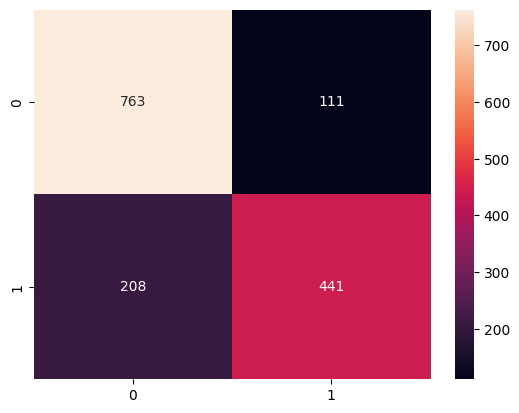

In [24]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = lr_model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
#print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="d")

## 4️⃣ **Grid Search CV** Logistic Regression

In [25]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2'],             # Regularization technique
    'solver': ['lbfgs', 'liblinear']  # Solvers for Logistic Regression
}

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


Accuracy after Hyperparameter Tuning: 0.7905449770190414

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       874
           1       0.80      0.68      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523


Confusion Matrix:


<Axes: >

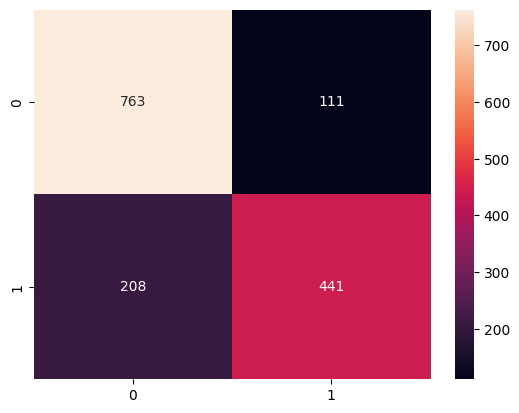

In [26]:
# Predict using the best model
y_pred_tuned = best_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_tuned)
print(f"Accuracy after Hyperparameter Tuning: {accuracy}")

# Classification report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_val, y_pred_tuned))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_val, y_pred_tuned), annot=True, fmt="d")

## ✅ Conclusion:
- A **Logistic Regression Model** (or one with a **Grid Search CV**) would likely achieve the **best possible accuracy** for this classification task. Though here, we do not see such indications.
- But, we are here to explore more models that are known to scale and **generalize better** than the traditional ML models.
- Hence, we now move to the **Fine-Tuned Bert Model**

# 🛠 Implementing a Fine-Tuned BERT Model

We will:

* Load and preprocess data.

* Tokenize text using a pre-trained BERT tokenizer.

* Fine-tune a BERT-based classification model.

* Evaluate its performance.

## 1️⃣ Install & Import Required Libraries

In [27]:
#!pip install transformers torch datasets

import torch
import numpy as np
import pandas as pd
import transformers
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


## 2️⃣ Load & Preprocess Data (Making something which resembles our train_df we got in EDA

In [28]:
# Train-Test Split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_df["text"].tolist(), train_df["target"].tolist(), test_size=0.1, random_state=42
)

## 3️⃣ Tokenize Text Using BERT

In [29]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments

# Load DistilBERT tokenizer for fast training
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [30]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=64)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=64)

# Include engineered features
train_extra_features = train_df.loc[train_df["text"].isin(train_texts), ["text_length", "has_url", "has_mention"]].values
val_extra_features = train_df.loc[train_df["text"].isin(val_texts), ["text_length", "has_url", "has_mention"]].values


## 4️⃣ Create a Custom Dataset Class

In [31]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels, extra_features):
        self.encodings = encodings
        self.labels = labels
        self.extra_features = torch.tensor(extra_features, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        item["extra_features"] = self.extra_features[idx]  # Add extra features
        return item

In [32]:
train_dataset = TweetDataset(train_encodings, train_labels, train_extra_features)
val_dataset = TweetDataset(val_encodings, val_labels, val_extra_features)


## 5️⃣ Load Pretrained BERT Model

In [33]:
# Load DistilBERT model (lightweight)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


## 6️⃣ Define Training Arguments

In [34]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",
    eval_steps=50,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    save_strategy="steps",
    save_steps=1500,  # Save every 500 steps instead of 50
    load_best_model_at_end=True,
    fp16=torch.cuda.is_available(),
    logging_dir="./logs",
    logging_steps=10,
    report_to="none"
)

## 7️⃣ Initialize Trainer & Train

In [35]:
# Remove all files in ./results
!rm -rf /kaggle/working/results/*

In [36]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Start Training
trainer.train()

Step,Training Loss,Validation Loss
50,0.616100,0.586617
100,0.575200,0.512063
150,0.772400,0.555167
200,0.572100,0.462739
250,0.583700,0.575296
300,0.596100,0.460723
350,0.510300,0.495592
400,0.420200,0.470382
450,0.388400,0.489597
500,0.446500,0.490930


Could not locate the best model at ./results/checkpoint-700/pytorch_model.bin, if you are running a distributed training on multiple nodes, you should activate `--save_on_each_node`.


TrainOutput(global_step=2571, training_loss=0.3760673261317488, metrics={'train_runtime': 143.8524, 'train_samples_per_second': 142.876, 'train_steps_per_second': 17.872, 'total_flos': 249926396279508.0, 'train_loss': 0.3760673261317488, 'epoch': 3.0})

## Step: Evaluate Model & Create Submission File
After training the BERT model, we will now:

- Load the test dataset
- Tokenize the test text
- Make predictions using the trained model
- Create a submission file in the required format

## 1️⃣ Load the Test Dataset

In [37]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from transformers import DistilBertTokenizer, Trainer
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download required NLTK data
nltk.download("punkt")
nltk.download("stopwords")

# Load test data
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2️⃣ Preprocess the Test set as same as training set

In [38]:
# 1. Convert text to lowercase
test_df["text"] = test_df["text"].str.lower()

# 2. Remove special characters
def remove_special_chars(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

test_df["text"] = test_df["text"].apply(remove_special_chars)

# 3. Tokenize text
test_df["text"] = test_df["text"].apply(word_tokenize)

# 4. Remove stopwords
stop_words = set(stopwords.words("english"))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

test_df["text"] = test_df["text"].apply(remove_stopwords)

# 5. Stem words
stemmer = PorterStemmer()
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

test_df["text"] = test_df["text"].apply(stem_words)

# 6. Join tokens back into strings
test_df["text"] = test_df["text"].apply(lambda x: " ".join(x))

# --- Feature Engineering (same as training) ---
# Add engineered features: text_length, has_url, has_mention
test_df["text_length"] = test_df["text"].apply(len)
test_df["has_url"] = test_df["text"].apply(lambda x: 1 if "http" in x else 0)
test_df["has_mention"] = test_df["text"].apply(lambda x: 1 if "@" in x else 0)

# --- Tokenization ---
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
test_texts = test_df["text"].tolist()
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=64)

# Extract extra features for test set
test_extra_features = test_df[["text_length", "has_url", "has_mention"]].values

# --- Create Test Dataset ---
class TweetDataset(Dataset):
    def __init__(self, encodings, extra_features, labels=None):
        self.encodings = encodings
        self.extra_features = torch.tensor(extra_features, dtype=torch.float32)
        self.labels = labels  # None for test set

    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx], dtype=torch.long) for key, val in self.encodings.items()}
        item["extra_features"] = self.extra_features[idx]
        if self.labels is not None:
            item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

test_dataset = TweetDataset(test_encodings, test_extra_features)

## 3️⃣ Make Predictions

In [39]:
predictions = trainer.predict(test_dataset)
pred_labels = predictions.predictions.argmax(-1)  # Get the predicted class (0 or 1)

In [40]:
test_df['Target'] = pred_labels
test_df.head()

,id,keyword,location,text,text_length,has_url,has_mention,Target
0,0,NaN,NaN,happen terribl car crash,24,0,0,0
1,2,NaN,NaN,heard earthquak differ citi stay safe everyon,45,0,0,1
2,3,NaN,NaN,forest fire spot pond gees flee across street ...,50,0,0,1
3,9,NaN,NaN,apocalyps light spokan wildfir,30,0,0,1
4,11,NaN,NaN,typhoon soudelor kill china taiwan,34,0,0,1


## 4️⃣ Create Submission File

In [41]:
!rm -rf /kaggle/working/results/*
!rm -rf /kaggle/working/output
# Save to CSV
df_pred = pd.DataFrame()
df_pred['id'] = test_df['id']
df_pred['Target'] = test_df['Target']
out = df_pred.to_csv("/kaggle/working/submission.csv", index=False)
print("Submission file saved as /kaggle/working/submission.csv")
# Display the first few rows to verify
print(df_pred.head())

Submission file saved as /kaggle/working/submission.csv
   id  Target
0   0       0
1   2       1
2   3       1
3   9       1
4  11       1


## ✅ Conclusion And Further Improvements:
- A **fine-tuned BERT model** (or one of its optimized variants like **RoBERTa** or **DistilBERT**) would likely achieve the **best possible accuracy** for this classification task.
- We can try out **LSTM** or other transformer based models as well.
- More data for disaster tweets can help enhance the training process.
- We have achieved a final F1 public score of 0.809 using fine-tuned **BERT**.

## **Github Link To This Python Notebook**
[https://github.com/kirkboyd1/DisasterTweets/blob/main/natural-language-processing-with-disaster-tweets.ipynb](http://)